In [75]:
# a.chernitsa@innopolis.university
!pip install pandas numpy matplotlib sklearn scipy seaborn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


- [Pandas one-hot-encoding](https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python)
- [Pandas concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
- [Select all Rows with NaN Values in Pandas DataFrame](https://datatofish.com/rows-with-nan-pandas-dataframe/)
- [Pandas drop NaN](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- [Substract mean value from every column](https://www.quora.com/How-do-I-subtract-the-mean-of-a-row-from-each-element-of-the-row-in-a-data-frame-in-Python-data-handling)
- [Tuning the Hyperparameters of your Machine Learning Model using GridSearchCV](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27)
- [Cycling encoding for datetime](https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('a1_dataset.csv')
df.head()

# encode var3 and var6
# encode var7 (extra points) or drop it
# actually we want to predict var4 since it has more than 600 missing values

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


In [77]:
VAR3 = 'OH' # 'ORD', OH'
VAR6 = 'ORD' # 'ORD', OH'
VAR7 = False # False, True
POL_DEGREE = 2 # 2, 3, 4
PCA_COM = 2 # 1, 2, 3

# Encoding var3 and var6

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
# Ordinal encoding
ordinal_encoder = OrdinalEncoder(dtype=int)
if VAR3 == 'ORD':
    df[['var3']] = ordinal_encoder.fit_transform(df[['var3']])
if VAR6 == 'ORD':
    df[['var6']] = ordinal_encoder.fit_transform(df[['var6']])
# df

In [80]:
# One hot encoding
if VAR6 == 'OH':
    df = df.join(pd.get_dummies(df['var6'], prefix='var6')).drop(['var6'], axis=1)
if VAR3 == 'OH':
    df = df.join(pd.get_dummies(df['var3'], prefix='var3')).drop(['var3'], axis=1)
df

,target,var1,var2,var4,var5,var6,var7,var3_Afghanistan,var3_Albania,var3_Algeria,...,var3_Uruguay,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe
0,0,509.18,417.681,138.0,393.00,0,2019-07-20 13:21:37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,446.06,666.182,81.0,352.05,1,2019-04-04 21:30:46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,235.50,398.097,90.0,339.00,0,2019-03-03 02:59:37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,306.02,518.163,102.0,439.25,1,2019-03-19 08:00:58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,453.08,600.156,105.0,422.95,0,2019-03-18 13:22:35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,NaN,350.45,1,2019-01-22 12:58:14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,1,342.62,473.919,NaN,200.85,0,2019-02-01 14:37:34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1,265.10,538.170,NaN,208.35,1,2019-06-13 18:50:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,0,397.12,622.386,NaN,433.45,1,2019-05-27 06:19:27,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It's also seems like var3 meaning country doesn't affect a lot onto the target, cause we have around 235 unique countries and this means only couple-triple of every row could have the same correlation. Thus, we can try to train the models with dropped var3.

## Dealing with var7

Actually, datetime is ruine in general, so the can try to check some of the part of the datetime. 

UPD. Datetime is not the right solution for me. I found the more accurate model without these features.

In [81]:
if VAR7:
    df['var7'] = pd.to_datetime(df['var7'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
    df['var7'] = df['var7'].fillna(df['var7'].mean())

    # df['date_year_sin'] = df['var7'].dt.year
    df['date_month_sin'] = np.sin(2 * np.pi * df['var7'].dt.month / 12.0)
    df['date_day_sin'] = np.sin(2 * np.pi * df['var7'].dt.day / 31.0)
    df['date_hour_sin'] = np.sin(2 * np.pi * df['var7'].dt.hour / 24.0)
    df['date_minute_sin'] = np.sin(2 * np.pi * df['var7'].dt.minute / 60.0)
    df['date_second_sin'] = np.sin(2 * np.pi * df['var7'].dt.second / 60.0)
    # df['date_year_cos'] = df['var7'].dt.year
    df['date_month_cos'] = np.cos(2 * np.pi * df['var7'].dt.month / 12.0)
    df['date_day_cos'] = np.cos(2 * np.pi * df['var7'].dt.day / 31.0)
    df['date_hour_cos'] = np.cos(2 * np.pi * df['var7'].dt.hour / 24.0)
    df['date_minute_cos'] = np.cos(2 * np.pi * df['var7'].dt.minute / 60.0)
    df['date_second_cos'] = np.cos(2 * np.pi * df['var7'].dt.second / 60.0)

df


,target,var1,var2,var4,var5,var6,var7,var3_Afghanistan,var3_Albania,var3_Algeria,...,var3_Uruguay,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe
0,0,509.18,417.681,138.0,393.00,0,2019-07-20 13:21:37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,446.06,666.182,81.0,352.05,1,2019-04-04 21:30:46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,235.50,398.097,90.0,339.00,0,2019-03-03 02:59:37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,306.02,518.163,102.0,439.25,1,2019-03-19 08:00:58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,453.08,600.156,105.0,422.95,0,2019-03-18 13:22:35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,NaN,350.45,1,2019-01-22 12:58:14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,1,342.62,473.919,NaN,200.85,0,2019-02-01 14:37:34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1,265.10,538.170,NaN,208.35,1,2019-06-13 18:50:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,0,397.12,622.386,NaN,433.45,1,2019-05-27 06:19:27,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df = df.drop('var7', axis=1)

# Data Imputation

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['var1', 'var2', 'var4', 'var5']] = scaler.fit_transform(df[['var1', 'var2', 'var4', 'var5']])
if 'var3' in df.columns.values:
    df[['var3']] = scaler.fit_transform(df[['var3']])

dates = ['date_year_sin', 'date_month_sin', 'date_day_sin', 'date_hour_sin', 'date_minute_sin', 'date_second_sin',
        'date_year_cos', 'date_month_cos', 'date_day_cos', 'date_hour_cos', 'date_minute_cos', 'date_second_cos']
for date in dates:
    if date in df.columns.values:
        df[[date]] = scaler.fit_transform(df[[date]])

df

,target,var1,var2,var4,var5,var6,var3_Afghanistan,var3_Albania,var3_Algeria,var3_American Samoa,...,var3_Uruguay,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe
0,0,1.697391,-0.967153,1.124118,0.857726,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.978641,0.871575,-1.044401,0.338188,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-1.419013,-1.112060,-0.702003,0.172622,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.616000,-0.223659,-0.245473,1.444505,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.058578,0.383030,-0.131340,1.237705,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,0.708541,-0.008370,NaN,0.317889,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,1,-0.199234,-0.551033,NaN,-1.580103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1,-1.081957,-0.075622,NaN,-1.484950,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,0,0.421360,0.547516,NaN,1.370919,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split

X = df.dropna(subset=('var4')).drop('var4', axis=1)
y = df.dropna(subset=('var4'))['var4']
target = df[df['var4'].isna()].drop('var4', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [86]:
linear_regression = LinearRegression().fit(X_train, y_train)
y_test_pred = linear_regression.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print('Linear Testing MSE = {}'.format(mean_squared_error(y_test, y_test_pred)))
print('Linear Testing MAE = {}'.format(mean_absolute_error(y_test, y_test_pred)))

Linear Testing MSE = 2.5341424664001328e+25
Linear Testing MAE = 962884660851.1235


In [88]:
linear_regression = LinearRegression()
polynomial_features = PolynomialFeatures(degree=POL_DEGREE, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train, y_train)
# print(pipeline[:-1].get_feature_names_out())
y_test_pred = pipeline.predict(X_test)

In [89]:
print('Polynomial Testing MSE = {}'.format(mean_squared_error(y_test, y_test_pred)))
print('Polynomial Testing MAE = {}'.format(mean_absolute_error(y_test, y_test_pred)))

Polynomial Testing MSE = 0.8691662488867251
Polynomial Testing MAE = 0.695584696073799


In [90]:
"""
Choose the best one. Actually is the Polynomial with degree 2.
Polynomial for one-hot-encoding with degree more than 2 is hard to compute.
So, we just try combinations of encodings and choose the best one.
"""
predicted = pipeline.predict(target)

In [91]:
df['var4'] = pd.concat([y, pd.Series(predicted, index=target.index.values)])
df

,target,var1,var2,var4,var5,var6,var3_Afghanistan,var3_Albania,var3_Algeria,var3_American Samoa,...,var3_Uruguay,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe
0,0,1.697391,-0.967153,1.124118,0.857726,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.978641,0.871575,-1.044401,0.338188,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-1.419013,-1.112060,-0.702003,0.172622,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.616000,-0.223659,-0.245473,1.444505,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.058578,0.383030,-0.131340,1.237705,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,0.708541,-0.008370,-1.332512,0.317889,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,1,-0.199234,-0.551033,0.538264,-1.580103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1,-1.081957,-0.075622,0.133402,-1.484950,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,0,0.421360,0.547516,-0.144264,1.370919,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pearson's correlation

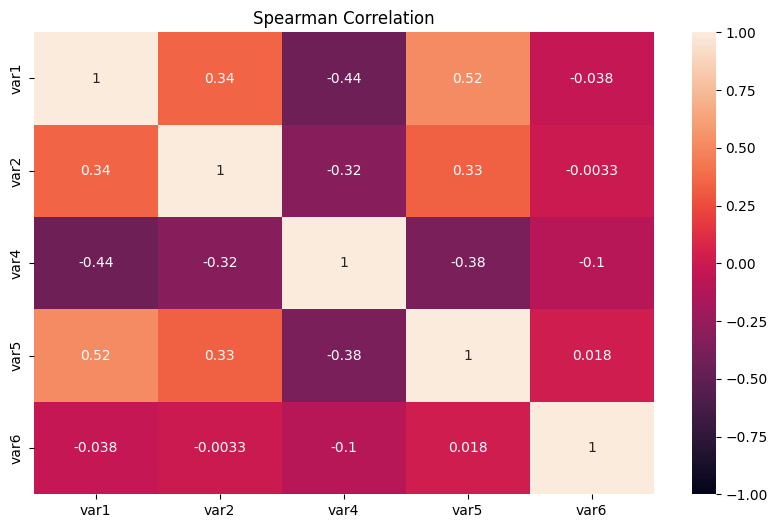

In [92]:
import seaborn as sns # For pairplots and heatmaps
# from scipy.stats import pearsonr

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    plt.show()   

display_correlation(df.iloc[:,:6].drop('target', axis=1))

# Implementing the PCA technique

In [93]:
def pca(data, target, *, n_components):
    df = data.copy()
    df = df.drop(target.name, axis=1)
    
    # 1. substract mean value
    df = df - df.mean(axis=0)

    # 2. compute covarianve matrix
    C = np.cov(df.T) # dimension should be same as the number of features
    
    # 3. find pairs of (eigenvector, eigenvalue)
    e, v = np.linalg.eig(C)
    e, v = map(np.real, (e, v))

    # 4. find d eigenvectors with highest eigenvalues
    W = sorted(zip(e, v.T), key=lambda x: np.abs(x[0]), reverse=True)[:n_components]
    W = np.array([x[1] for x in W])
    
    # 5. compute X' = XW
    X_prime = df @ W.T
    
    return X_prime

    

In [94]:
df_reduced = pca(df, df['target'], n_components=PCA_COM)
df_reduced

,0,1
0,-0.461645,-1.554427
1,-1.588261,0.249865
2,0.891661,-0.670751
3,-0.441499,-0.530377
4,-1.482262,-0.422275
...,...,...
920,-1.155562,-0.467087
921,1.452191,0.172781
922,1.489938,0.789117
923,-1.283353,-0.135613


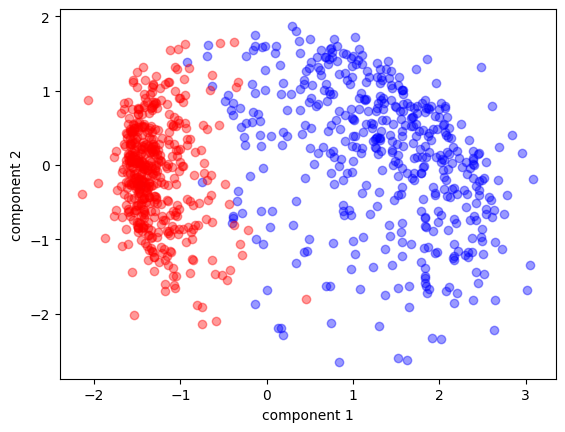

In [95]:
def plot_2_components_2d(df, df_reduced):
    temp = df_reduced.copy()
    temp['target'] = df['target']
    target_0 = temp[temp['target'] == 0]
    target_1 = temp[temp['target'] == 1]
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_ylabel('component 2')
    ax.set_xlabel('component 1')
    ax.scatter(target_1.iloc[:,0], target_1.iloc[:,1], color='b', alpha=0.4)
    ax.scatter(target_0.iloc[:,0], target_0.iloc[:,1], color='r', alpha=0.4)
    plt.show()

    
def plot_3_components_3d(df, df_reduced):
    temp = df_reduced.copy()
    temp['target'] = df['target']
    target_0 = temp[temp['target'] == 0]
    target_1 = temp[temp['target'] == 1]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(target_1.iloc[:,0], target_1.iloc[:,1], target_1.iloc[:,2], color='b', alpha=0.4)
    ax.scatter(target_0.iloc[:,0], target_0.iloc[:,1], target_0.iloc[:,2], color='r', alpha=0.4)
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    ax.set_zlabel('component 3')

    ax.view_init(30, 45)
    plt.show()


plot_2_components_2d(df, df_reduced)
if PCA_COM == 3:
    plot_3_components_3d(df, df_reduced)

# Training part

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score # F1 = 2 * (precision * recall) / (precision + recall)

X, y = df.drop('target', axis=1), df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X, y = df_reduced, df['target']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
def naive_bayes(*, x_train, x_test, y_train, y_test):
    gauss_nb = GaussianNB()
    gauss_nb.fit(x_train, y_train)
    scores = cross_val_score(gauss_nb, x_test, y_test, cv=3, scoring='f1')
#     print(scores)
    avg_score = np.mean(scores)
#     print(avg_score)
#     gauss_nb.fit(x_train, y_train)
#     y_pred = gauss_nb.predict(x_test)
#     print(f"F1 score for naive bayes: {f1_score(y_test, y_pred):6f}")
    print(f"F1 score for naive bayes: {avg_score:6f}")
    return f"F1 score for naive bayes: {avg_score:6f}"

In [98]:
n_b_res = naive_bayes(x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test)

F1 score for naive bayes: 0.521568


In [99]:
n_b_res_pca = naive_bayes(x_train=X_train_pca, x_test=X_test_pca, y_train=y_train_pca, y_test=y_test_pca)

F1 score for naive bayes: 0.984292


In [100]:
def logistic_regression(*, x_train, x_test, y_train, y_test):
    import warnings
    warnings.filterwarnings('ignore')
    
    param_grid = {
        'penalty': ['none', 'l2'], # lbfgs works only with these
        'C': np.linspace(0, 1, 10), # strong of the regularization
    }
    grid_search_clf = GridSearchCV(
        estimator=LogisticRegression(random_state=0),
        cv=3, scoring='f1',
        param_grid=param_grid
    )
    
    grid_search_clf.fit(x_train, y_train)
    print("Best params: ", grid_search_clf.best_params_)
    
#     log_reg = LogisticRegression(random_state=0)
#     log_reg.fit(x_train, y_train)
#     y_pred = log_reg.predict(x_test)
    y_pred = grid_search_clf.predict(x_test)
    # print(sorted(zip(grid_search_clf.feature_names_in_, grid_search_clf.best_estimator_.coef_[0]), key=lambda x: np.abs(x[1]))[::-1], grid_search_clf.best_estimator_.intercept_)
    print(f"F1 score for logistic regression: {f1_score(y_test, y_pred):6f}")
    return f"F1 score for logistic regression: {f1_score(y_test, y_pred):6f}"

In [101]:
log_reg_res = logistic_regression(x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test)

Best params:  {'C': 0.6666666666666666, 'penalty': 'l2'}
F1 score for logistic regression: 0.983957


In [102]:
log_reg_res_pca = logistic_regression(x_train=X_train_pca, x_test=X_test_pca, y_train=y_train_pca, y_test=y_test_pca)

Best params:  {'C': 0.0, 'penalty': 'none'}
F1 score for logistic regression: 0.994709


In [103]:
def knn(*, x_train, x_test, y_train, y_test):
    param_grid = {
        'n_neighbors':list(range(1, 11)),
        'weights':['uniform', 'distance'],
        'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
    }
    grid_search_clf = GridSearchCV(
        estimator=KNeighborsClassifier(),
        cv=3, scoring='f1',
        param_grid=param_grid
    )
    
    grid_search_clf.fit(x_train, y_train)
    
    print("Best params: ", grid_search_clf.best_params_)

    y_pred = grid_search_clf.predict(x_test)
    
    print(f"F1 score for KNN: {f1_score(y_test, y_pred):6f}")
    return f"F1 score for KNN: {f1_score(y_test, y_pred):6f}"

In [104]:
knn_res = knn(x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test)

Best params:  {'metric': 'cosine', 'n_neighbors': 8, 'weights': 'distance'}
F1 score for KNN: 0.972973


In [105]:
knn_res_pca = knn(x_train=X_train_pca, x_test=X_test_pca, y_train=y_train_pca, y_test=y_test_pca)

Best params:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
F1 score for KNN: 0.973822


In [106]:
print("Encoding var3: {}\nEncoding var6: {}\nExisting var7: {}\nPolynomial features: {}\nPCA number of components: {}".format('ordinal' if VAR3 == 'ORD' else 'one-hot', 
                                                    'ordinal' if VAR6 == 'ORD' else 'one-hot',
                                                    'no'*(not VAR7) + 'yes' * VAR7,
                                                    POL_DEGREE,
                                                    PCA_COM))
print()
print(f"{n_b_res} (non PCA)\n{n_b_res_pca}\n{log_reg_res} (non PCA)\n{log_reg_res_pca}\n{knn_res} (non PCA)\n{knn_res_pca}")

Encoding var3: one-hot
Encoding var6: ordinal
Existing var7: no
Polynomial features: 2
PCA number of components: 2

F1 score for naive bayes: 0.521568 (non PCA)
F1 score for naive bayes: 0.984292
F1 score for logistic regression: 0.983957 (non PCA)
F1 score for logistic regression: 0.994709
F1 score for KNN: 0.972973 (non PCA)
F1 score for KNN: 0.973822


## Best result

F1 score for naive bayes: 0.521568 (non PCA)  
F1 score for naive bayes: 0.984292  
F1 score for logistic regression: 0.983957 (non PCA)  
***F1 score for logistic regression: 0.994709***  
F1 score for KNN: 0.972973 (non PCA)  
F1 score for KNN: 0.973822  